In [1]:
import pandas as pd
import fastparquet
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
figures = pd.read_parquet('../data/figures.parquet', engine='fastparquet')
submissions = pd.read_csv('../data/submissions.csv')

In [3]:
figures.head()

,adsh,tag,reported_figure,quarterly_figure,reported_figure_py,quarterly_figure_py,computed
0,4711109000038,AccountsNotesAndLoansReceivableNetCurrent,272542000.0,272542000.0,NaN,NaN,True
1,4711109000038,AccountsPayable,279706000.0,279706000.0,NaN,NaN,False
2,4711109000038,AccountsPayableAndAccruedLiabilities,740010000.0,740010000.0,NaN,NaN,True
3,4711109000038,AccountsReceivableNetCurrent,272542000.0,272542000.0,NaN,NaN,False
4,4711109000038,AccruedIncomeTaxesPayable,0.0,0.0,NaN,NaN,False


In [4]:
submissions.head()

,adsh,cik,sic,form,period,accepted,version,amendment_adsh,is_amended,ticker,start,end,start_2,end_2,start_3,end_3,start_4,end_4
0,141057824001617,1750,3720,10-Q,2024-08-31,2024-09-23 17:45:00,2024,0,False,air,2024-06-01,2024-08-31,NaN,NaN,2023-06-01,2023-08-31,NaN,NaN
1,110465924080890,1750,3720,10-K,2024-05-31,2024-07-18 17:43:00,2023,0,False,air,2023-06-01,2024-05-31,NaN,NaN,2022-06-01,2023-05-31,NaN,NaN
2,110465924037408,1750,3720,10-Q,2024-02-29,2024-03-21 17:26:00,2023,0,False,air,2023-06-01,2024-02-29,2023-12-01,2024-02-29,2022-06-01,2023-02-28,2022-12-01,2023-02-28
3,110465923128321,1750,3720,10-Q,2023-11-30,2023-12-21 17:20:00,2023,0,False,air,2023-06-01,2023-11-30,2023-09-01,2023-11-30,2022-06-01,2022-11-30,2022-09-01,2022-11-30
4,110465923103944,1750,3720,10-Q,2023-08-31,2023-09-26 17:14:00,2023,0,False,air,2023-06-01,2023-08-31,NaN,NaN,2022-06-01,2022-08-31,NaN,NaN


In [5]:
# Merge datasets on 'adsh'
merged_data = pd.merge(figures, submissions, on='adsh')

# Filter for annual filings (10-K)
annual_filings = merged_data[merged_data['form'] == '10-K']

# Display the first few rows
annual_filings.head()

,adsh,tag,reported_figure,quarterly_figure,reported_figure_py,quarterly_figure_py,computed,cik,sic,form,...,is_amended,ticker,start,end,start_2,end_2,start_3,end_3,start_4,end_4
10895,119312509179839,AccountsNotesAndLoansReceivableNetCurrent,115802000.0,NaN,134396000.0,NaN,True,1002638,7373,10-K,...,False,otex,2008-07-01,2009-06-30,NaN,NaN,2007-07-01,2008-06-30,NaN,NaN
10896,119312509179839,AccountsPayableAndAccruedLiabilities,10356000.0,NaN,13499000.0,NaN,True,1002638,7373,10-K,...,False,otex,2008-07-01,2009-06-30,NaN,NaN,2007-07-01,2008-06-30,NaN,NaN
10897,119312509179839,AccountsPayableAndAccruedLiabilitiesNoncurrent,23073000.0,NaN,20513000.0,NaN,False,1002638,7373,10-K,...,False,otex,2008-07-01,2009-06-30,NaN,NaN,2007-07-01,2008-06-30,NaN,NaN
10898,119312509179839,AccountsReceivableNetCurrent,115802000.0,NaN,134396000.0,NaN,False,1002638,7373,10-K,...,False,otex,2008-07-01,2009-06-30,NaN,NaN,2007-07-01,2008-06-30,NaN,NaN
10899,119312509179839,AccruedIncomeTaxesPayable,10356000.0,NaN,13499000.0,NaN,False,1002638,7373,10-K,...,False,otex,2008-07-01,2009-06-30,NaN,NaN,2007-07-01,2008-06-30,NaN,NaN


In [ ]:
# List of columns to drop
columns_to_drop = [
    'start_2', 'end_2', 
    'start_3', 'end_3', 
    'start_4', 'end_4', 
    'quarterly_figure', 
    'reported_figure_py', 
    'quarterly_figure_py'
]

# Drop the specified columns
data = annual_filings.drop(columns=columns_to_drop)

In [8]:
# Ensure the 'period' column is in datetime format
data['period'] = pd.to_datetime(data['period'])

# Filter rows where the period is after 2016
# filtered_data = data[data['period'] > '2016-12-31']

In [32]:
# Just looked if the netincome value is aligned with the actual netincome reported
data[(data["ticker"] == "msft") &  (data["tag"] == "NetIncomeLoss")]


,adsh,tag,reported_figure,computed,cik,sic,period,accepted,version,ticker,start,end
1540507,119312514289961,NetIncomeLoss,2.207400e+10,False,789019,7372,2014-06-30,2014-07-31 17:17:00,2013,msft,2013-07-01,2014-06-30
2590050,119312515272806,NetIncomeLoss,1.219300e+10,False,789019,7372,2015-06-30,2015-07-31 15:08:00,2015,msft,2014-07-01,2015-06-30
3224408,119312516662209,NetIncomeLoss,1.679800e+10,False,789019,7372,2016-06-30,2016-07-28 16:12:00,2016,msft,2015-07-01,2016-06-30
4121914,156459017014900,NetIncomeLoss,2.120400e+10,False,789019,7372,2017-06-30,2017-08-02 16:15:00,2017,msft,2016-07-01,2017-06-30
4796897,156459018019062,NetIncomeLoss,1.657100e+10,False,789019,7372,2018-06-30,2018-08-03 11:04:00,2018,msft,2017-07-01,2018-06-30
4888433,156459019027952,NetIncomeLoss,3.924000e+10,False,789019,7372,2019-06-30,2019-08-01 16:10:00,2018,msft,2018-07-01,2019-06-30
6291519,156459020034944,NetIncomeLoss,4.428100e+10,False,789019,7372,2020-06-30,2020-07-30 20:45:00,2020,msft,2019-07-01,2020-06-30
6405516,156459021039151,NetIncomeLoss,6.127100e+10,False,789019,7372,2021-06-30,2021-07-29 16:22:00,2020,msft,2020-07-01,2021-06-30
8083556,156459022026876,NetIncomeLoss,7.273800e+10,False,789019,7372,2022-06-30,2022-07-28 16:06:00,2022,msft,2021-07-01,2022-06-30
8434764,95017023035122,NetIncomeLoss,7.236100e+10,False,789019,7372,2023-06-30,2023-07-27 16:02:00,2023,msft,2022-07-01,2023-06-30


# Variable Explanation

- **`adsh`**: Accession number of the SEC filing.
- **`cik`**: Unique company identifier assigned by the SEC.
- **`sic`**: Industry classification code for the company.
- **`ticker`**: Stock ticker symbol (e.g., AAPL for Apple).
- **`form`**: SEC filing type (e.g., 10-K for annual reports).
- **`period`**: Fiscal period end date (YYYY-MM-DD).
- **`accepted`**: Date and time when the filing was accepted.
- **`amendment_adsh`**: Accession number of an amended filing.
- **`is_amended`**: Boolean indicating if the filing is an amendment.
- **`version`**: XBRL taxonomy version used for tagging.
- **`tag`**: Accounting tag (e.g., `NetIncomeLoss`).
- **`reported_figure`**: Numeric value of the reported financial item.
- **`computed`**: Boolean indicating if the value is computed.
- **`start`**: Start date of the reporting period (YYYY-MM-DD).
- **`end`**: End date of the reporting period (YYYY-MM-DD).


In [18]:
data.isna().sum()

adsh               0
tag                0
reported_figure    0
computed           0
cik                0
sic                0
form               0
period             0
accepted           0
version            0
amendment_adsh     0
is_amended         0
ticker             0
start              0
end                0
dtype: int64

In [ ]:
# Number of companies in the dataset
data["ticker"].nunique()

5077

In [ ]:
# Size is pretty large (>1.5gb)
data.to_csv("../data/annual_filings.csv")

-----------------------------------------

In [71]:
data = pd.read_csv("../data/annual_filings.csv")
data.drop(columns=["Unnamed: 0"], inplace=True)
data.head()

,adsh,tag,reported_figure,computed,cik,sic,form,period,accepted,version,amendment_adsh,is_amended,ticker,start,end
0,119312509179839,AccountsNotesAndLoansReceivableNetCurrent,115802000.0,True,1002638,7373,10-K,2009-06-30,2009-08-21 16:34:00,2008,0,False,otex,2008-07-01,2009-06-30
1,119312509179839,AccountsPayableAndAccruedLiabilities,10356000.0,True,1002638,7373,10-K,2009-06-30,2009-08-21 16:34:00,2008,0,False,otex,2008-07-01,2009-06-30
2,119312509179839,AccountsPayableAndAccruedLiabilitiesNoncurrent,23073000.0,False,1002638,7373,10-K,2009-06-30,2009-08-21 16:34:00,2008,0,False,otex,2008-07-01,2009-06-30
3,119312509179839,AccountsReceivableNetCurrent,115802000.0,False,1002638,7373,10-K,2009-06-30,2009-08-21 16:34:00,2008,0,False,otex,2008-07-01,2009-06-30
4,119312509179839,AccruedIncomeTaxesPayable,10356000.0,False,1002638,7373,10-K,2009-06-30,2009-08-21 16:34:00,2008,0,False,otex,2008-07-01,2009-06-30


In [72]:
data["is_amended"].value_counts()

is_amended
False    9215633
Name: count, dtype: int64

In [73]:
data.drop(columns=["is_amended", "amendment_adsh", "form"], inplace=True)

In [74]:
# make period to datetime format and get the value_counts()
data["period"] = pd.to_datetime(data["period"])
data["period"].dt.year.value_counts()

period
2021    886292
2022    884213
2023    827685
2020    806049
2019    766213
2018    722843
2017    695100
2016    665183
2015    638488
2014    604472
2013    553231
2012    499069
2011    352392
2024    163794
2010    117673
2009     32643
2004        59
2007        59
2006        59
2005        59
2008        57
Name: count, dtype: int64

In [78]:
# filter those whose year in period is higher than 2014 and lower than 2024
data = data[(data["period"].dt.year >= 2014) & (data["period"].dt.year <= 2023)]

In [79]:
# Step 1: Filter data for the years 2014–2023
company_data = data[["period", "cik"]].copy()  # Copy to avoid modifying the original dataframe
company_data["year"] = company_data["period"].dt.year  # Extract year from 'period'
company_data.drop(columns=["period"], inplace=True)  # Drop 'period' column
company_data.drop_duplicates(inplace=True)  # Remove duplicates

# Step 2: Count reports per company within the 2014–2023 range
company_counts = company_data.groupby("cik")["year"].count()  # Count number of years per cik

# Step 3: Filter companies with exactly 10 reports
valid_companies = company_counts[company_counts == 10].index  # Get CIKs with exactly 10 reports

# Step 4: Filter the original data for only valid companies
filtered_data = company_data[company_data["cik"].isin(valid_companies)]  # Retain only valid companies

# Step 5: Validate that the number of companies is the same across all years
result = filtered_data.groupby("year")["cik"].nunique()  # Count unique companies by year
print(result)


year
2014    1446
2015    1446
2016    1446
2017    1446
2018    1446
2019    1446
2020    1446
2021    1446
2022    1446
2023    1446
Name: cik, dtype: int64


In [83]:
# Filter the data for the valid companies
data_filtered = data[data["cik"].isin(valid_companies)]
data_filtered.shape

(3690532, 12)

In [114]:
# check if a tag contains the word Extension or extension
data_filtered[data_filtered["tag"].str.contains("profitloss", case=False, na=False)]["tag"].unique()


array(['ProfitLoss',
       'DisposalGroupIncludingDiscontinuedOperationGrossProfitLoss',
       'EquityMethodInvestmentSummarizedFinancialInformationGrossProfitLoss',
       'ProfitLossFromRealEstateOperations',
       'EquityMethodInvestmentUnrealizedIntercompanyProfitLossNotEliminatedAmount',
       'SalesTypeAndDirectFinancingLeasesProfitLoss',
       'SalesTypeLeaseSellingProfitLoss'], dtype=object)

In [150]:
data[(data["ticker"] == "msft") &  (data["tag"] == "NetIncomeLossAvailableToCommonStockholdersDiluted")]
# (data["tag"] == "BasicAndDilutedEarningsLossPerShare")

,adsh,tag,reported_figure,computed,cik,sic,period,accepted,version,ticker,start,end
2590052,119312515272806,NetIncomeLossAvailableToCommonStockholdersDiluted,1.219300e+10,True,789019,7372,2015-06-30,2015-07-31 15:08:00,2015,msft,2014-07-01,2015-06-30
3224410,119312516662209,NetIncomeLossAvailableToCommonStockholdersDiluted,1.679800e+10,True,789019,7372,2016-06-30,2016-07-28 16:12:00,2016,msft,2015-07-01,2016-06-30
4121916,156459017014900,NetIncomeLossAvailableToCommonStockholdersDiluted,2.120400e+10,True,789019,7372,2017-06-30,2017-08-02 16:15:00,2017,msft,2016-07-01,2017-06-30
4796899,156459018019062,NetIncomeLossAvailableToCommonStockholdersDiluted,1.657100e+10,True,789019,7372,2018-06-30,2018-08-03 11:04:00,2018,msft,2017-07-01,2018-06-30
4888435,156459019027952,NetIncomeLossAvailableToCommonStockholdersDiluted,3.924000e+10,True,789019,7372,2019-06-30,2019-08-01 16:10:00,2018,msft,2018-07-01,2019-06-30
6291521,156459020034944,NetIncomeLossAvailableToCommonStockholdersDiluted,4.428100e+10,True,789019,7372,2020-06-30,2020-07-30 20:45:00,2020,msft,2019-07-01,2020-06-30
6405518,156459021039151,NetIncomeLossAvailableToCommonStockholdersDiluted,6.127100e+10,True,789019,7372,2021-06-30,2021-07-29 16:22:00,2020,msft,2020-07-01,2021-06-30
8083558,156459022026876,NetIncomeLossAvailableToCommonStockholdersDiluted,7.273800e+10,True,789019,7372,2022-06-30,2022-07-28 16:06:00,2022,msft,2021-07-01,2022-06-30
8434766,95017023035122,NetIncomeLossAvailableToCommonStockholdersDiluted,7.236100e+10,True,789019,7372,2023-06-30,2023-07-27 16:02:00,2023,msft,2022-07-01,2023-06-30


In [ ]:
# drop "version", "accepted", "start" and "end" and "computed"
data_filtered.drop(columns=["version", "accepted", "start", "end", "computed"], inplace=True)

In [127]:
# reshape the data in a suitable format
reshaped_data = data.pivot(index=['adsh', 'cik', 'sic', 'period', 'ticker'], 
                           columns='tag', 
                           values='reported_figure').reset_index()

In [ ]:
print(reshaped_data[reshaped_data["NetIncomeLoss"].notna()].isna().sum().sort_values().head(50))


tag
NetIncomeLoss                                                                                                     0
cik                                                                                                               0
ticker                                                                                                            0
period                                                                                                            0
adsh                                                                                                              0
NetIncomeLossAvailableToCommonStockholdersBasic                                                                   0
sic                                                                                                               0
ProfitLoss                                                                                                        8
IncomeLossFromContinuingOperationsIncludingPortionAttributableToNonc

In [154]:
reshaped_data.shape

(33544, 7191)

In [155]:
# Calculate the threshold for missing values
threshold = reshaped_data.shape[0] * 0.5

# Drop columns with more than 50% missing values
reshaped_data2 = reshaped_data.loc[:, reshaped_data.isna().sum() <= threshold]

# Display the resulting dataframe
reshaped_data2.head()


tag,adsh,cik,sic,period,ticker,AccountsNotesAndLoansReceivableNetCurrent,AccountsPayableAndAccruedLiabilitiesCurrent,AccountsPayableCurrent,AccountsReceivableNetCurrent,AccruedLiabilitiesCurrent,...,Revenues,SellingGeneralAndAdministrativeExpense,ShareBasedCompensation,StockIssuedDuringPeriodSharesPeriodIncreaseDecrease,StockholdersEquity,StockholdersEquityIncludingPortionAttributableToNoncontrollingInterest,StockholdersEquityPeriodIncreaseDecrease,UnrecognizedTaxBenefits,WeightedAverageNumberOfDilutedSharesOutstanding,WeightedAverageNumberOfSharesOutstandingBasic
0,217815000014,2178,5172,2014-12-31,ae,144434000.0,166951000.0,160743000.0,144434000.0,6208000.0,...,4.132826e+09,8613000.0,NaN,NaN,157497000.0,157497000.0,-3711000.0,NaN,NaN,NaN
1,217816000064,2178,5172,2015-12-31,ae,71813000.0,79962000.0,74117000.0,71813000.0,5845000.0,...,1.944279e+09,9939000.0,NaN,NaN,152510000.0,152510000.0,-3712000.0,NaN,NaN,NaN
2,217817000019,2178,5172,2016-12-31,ae,87162000.0,79897000.0,79897000.0,87162000.0,NaN,...,1.099540e+09,10410000.0,NaN,NaN,151312000.0,151312000.0,-5632000.0,NaN,NaN,NaN
3,217818000009,2178,5172,2017-12-31,ae,121353000.0,124706000.0,124706000.0,121353000.0,NaN,...,1.322060e+09,9707000.0,NaN,NaN,147119000.0,147119000.0,-6656000.0,NaN,NaN,NaN
4,217819000011,2178,5172,2018-12-31,ae,85197000.0,116068000.0,116068000.0,85197000.0,NaN,...,1.750213e+09,8937000.0,255000.0,NaN,146598000.0,146598000.0,-2947000.0,NaN,4218000.0,4218000.0


In [ ]:
# Calculate the threshold for missing values
row_threshold = reshaped_data2.shape[1] * 0.5

# Drop rows where more than 50% of the values are missing
filtered_data3 = reshaped_data2.loc[reshaped_data2.isna().sum(axis=1) <= row_threshold]


In [182]:
# print a correlation matrix between the columns, which are not objects or booleans, so filter the columns based on the dtype first
numbered = filtered_data3.select_dtypes(include=[np.number]).head()
numbered.drop(columns=["cik", "sic", "adsh"], inplace=True)
numbered = numbered.fillna(0)
correlation_matrix = numbered.corr(method='spearman')

<Axes: xlabel='tag', ylabel='tag'>

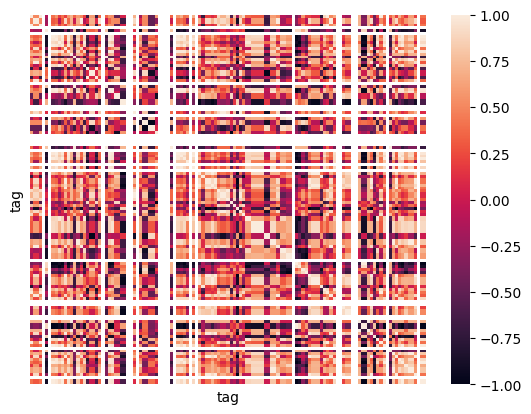

In [183]:
# make a heatmap of the correlation matrix without displaying the values and the column names
sns.heatmap(correlation_matrix, annot=False, xticklabels=False, yticklabels=False)

In [186]:
# Step 2: Count reports per company within the 2014–2023 range
company_counts = filtered_data3.groupby("cik").count()  # Count number of years per cik

# Step 3: Filter companies with exactly 10 reports
valid_companies = filtered_data3[company_counts == 10].index  # Get CIKs with exactly 10 reports

# Step 4: Filter the original data for only valid companies
filtered_data4 = filtered_data3[filtered_data3["cik"].isin(valid_companies)]  # Retain only valid companies

In [ ]:
filtered_data4.shape
# looks bad...

(750, 132)